##Evaluation model

### training progress --- loss

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
histories = scores
val_loss = []
loss = []
val_acc = []
acc = []

for i in range(0, len(histories)):
  val_loss.append(histories[i].history['val_loss'])
  loss.append(histories[i].history['loss'])
  val_acc.append(histories[i].history['val_acc'])
  acc.append(histories[i].history['acc'])

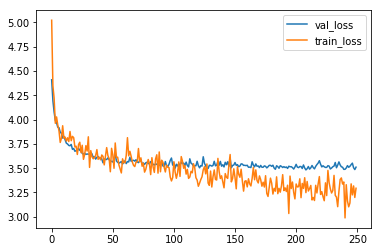

In [0]:
plt.plot(val_loss, label='val_loss')
plt.plot(loss, label='train_loss')
plt.legend(loc='upper right')
plt.show()

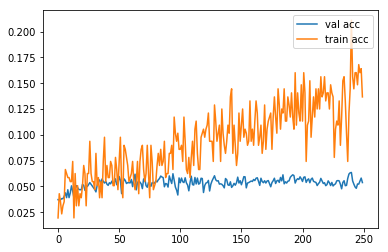

In [0]:
plt.plot(val_acc, label='val acc')
plt.plot(acc, label='train acc')
plt.legend(loc='upper right')
plt.show()

In [0]:
#test_x and test_y are splited when preparing training and test set by sklearn
# from sklearn.model_selection import train_test_split
# train_x[:], test_x[:], train_y[:], test_y[:] = train_test_split(fp, target_classes, test_size=0.3)
faceage_vgg_model.evaluate(test_x, test_y, verbose=1)

6642/6642 [==============================] - 78s 12ms/step


[3.510567364725712, 0.05374887082204156]

In [0]:
predictions = facegender_vgg_model.predict(test_x)

In [0]:
age_categories = np.array([i for i in range(0, 101)]) # 0 - 100
cal_preds = np.sum(predictions * age_categories, axis = 1)

In [0]:
#calculate the MAE (Mean Absolute Error)
cal_MAE = 0
 c
for i in range(0 ,cal_preds.shape[0]):
  pred = int(cal_preds[i])
  actual = np.argmax(test_y[i])

  abs_error = abs(pred - actual)
  cal_MAE = cal_MAE + abs_error

cal_MAE = cal_MAE / cal_preds.shape[0]
 
print("MAE: ",cal_MAE)
print("test instances: ",cal_preds.shape[0])

MAE:  6.302168021680217
test instances:  6642


##TEST on generated faces

In [0]:
# cp ./drive/'My Drive'/Test_DATA/BestModel_estimator/age_model_weights.h5 ./

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from keras.models import load_model
  
age_vgg_model= load_model("./BestModel_estimator/age_model.h5") 
age_vgg_model.load_weights('./BestModel_estimator/age_model_weights.h5')

In [0]:
#load images->resize->normalization
def image_load(img_path, target_size=(224,224)):
  img_array = cv2.imread(img_path)
  if img_array is not None:
      img = cv2.resize(img_array, target_size)
      img = np.expand_dims(img, axis=0)
      img = img/255
  return img

In [0]:
age_categories = np.array([i for i in range(0, 101)]) # 0 - 100

In [0]:
image_path = "048A54.JPG"
pred = age_vgg_model.predict(image_load(image_path))

In [0]:
pred_result = np.sum(pred * age_categories, axis = 1)

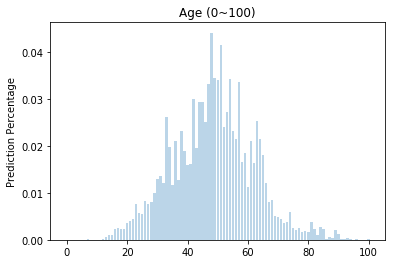

In [0]:
#analyis the percentage 
y_pos = np.arange(len(age_categories))
plt.bar(y_pos, pred[0], align='center', alpha=0.3)
plt.ylabel('Prediction Percentage')
plt.title('Age (0~100)')
plt.show()

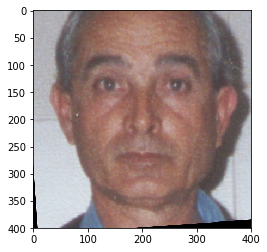

The most possible age 48
Calcualtion of precise age:  48


In [0]:
plt.imshow(image.load_img(image_path))
plt.show()

print("The most possible age",np.argmax(pred))
age = int(np.sum(pred * age_categories, axis = 1))
print("Calcualtion of precise age: ", age)

##Verify Fake face

In [0]:
cp -r ./drive/'My Drive'/Test_DATA/BestModel_estimator/ ./

In [0]:
mkdir testdata

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from keras.models import load_model
  
age_vgg_model= load_model("./BestModel_estimator/age_model.h5") 
age_vgg_model.load_weights('./BestModel_estimator/age_model_weights.h5')

In [0]:
gender_vgg_model = load_model("./BestModel_estimator/gender_model.h5") 
gender_vgg_model.load_weights('./BestModel_estimator/gender_model_weights.h5')

In [0]:
#load images->resize->normalization
def image_load(img_path, target_size=(224,224)):
  img_array = cv2.imread(img_path)
  if img_array is not None:
      img = cv2.resize(img_array, target_size)
      img = np.expand_dims(img, axis=0)
      img = img/255
  return img

In [0]:
age_categories = np.array([i for i in range(0, 101)]) # 0 - 100

In [0]:
image_path = "./testdata/15_Diego_Boneta_0001.jpg_0.jpg_4.jpg"
pred = age_vgg_model.predict(image_load(image_path))

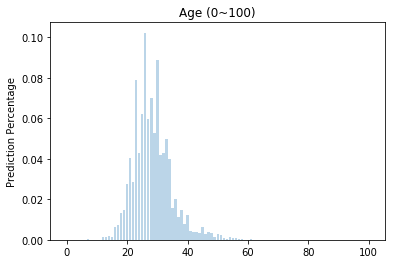

In [0]:
#analyis the percentage 
x_pos = np.arange(len(age_categories))
plt.bar(x_pos, pred[0], align='center', alpha=0.3)
plt.ylabel('Prediction Percentage')
plt.title('Age (0~100)')
plt.show()

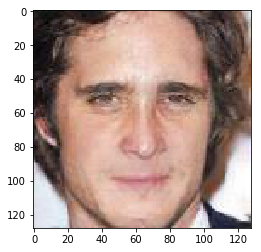

The most possible age 1
Calcualtion of precise age:  36
gender:  Male


In [0]:
plt.imshow(image.load_img(image_path))
plt.show()

print("The most possible age",np.argmax(pred))
age = int(np.sum(pred * age_categories, axis = 1))
print("Calcualtion of precise age: ", age)

In [0]:
fig, axs = plt.subplots(3, 1, figsize=(5, 6), tight_layout=True)
locs = ['center', 'left', 'right']
for ax, loc in zip(axs, locs):
    ax.plot(x1, y1)
    ax.set_title('Title with loc at '+loc, loc=loc)
plt.show()

In [0]:
fig, ax = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(15,5))

ax[0].imshow(img)

In [0]:
images1 = ['10_015A.JPG','10_015A.JPG_1.jpg','10_015A.JPG_2.jpg','10_015A.JPG_3.jpg','10_015A.JPG_4.jpg']
images2 = ['18_002A.JPG', '18_002A.JPG_1.jpg','18_002A.JPG_2.jpg','18_002A.JPG_3.jpg','18_002A.JPG_4.jpg']
images3 = ['05_080A05.jpg','test_as_female.png31.png','test_as_female.png21.png','test_as_female.png11.png','test_as_female.png1.png']
# path  = './testdata/'
path = './'
conver_images1 = []
ages1 = []
genders1 = []

conver_image2=[]
ages2=[]
genders2 = []


In [0]:
ages = []
conver_images = []
genders = []

images_all = images3
#load images
for img in images_all:
  
  img_temp = image.load_img(os.path.join(path,img))
  
  pred_age =  age_vgg_model.predict(image_load(os.path.join(path,img)))
  pred_gender = gender_vgg_model.predict(image_load(os.path.join(path,img)))
  gender = "M" if np.argmax(pred_gender) == 1 else "F"
  age = int(np.sum(pred_age * age_categories, axis = 1))
  
  ages.append(str(age))
  conver_images.append(img_temp)
  genders.append(gender)
  
ages3 = ages
conver_images3= conver_images
genders3 = genders

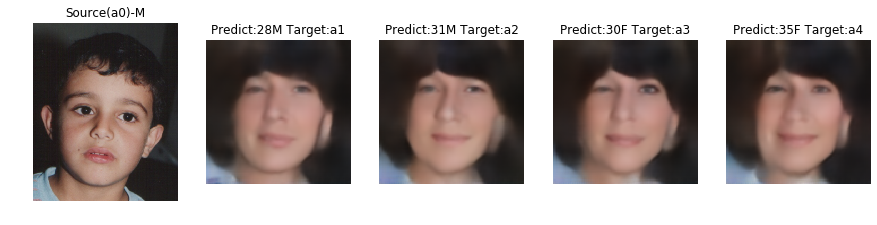

In [0]:
fig = plt.figure(figsize = (15,5))
if len(conver_images3) > 4: #5
  for index in range(1,6):
    plt.subplot(1, 5, index)
    plt.imshow(conver_images3[index-1])
    if index == 1:
      plt.title('Source(a0)-' + genders3[index-1])
    else:
      plt.title("Predict:" +ages3[index-1]+ genders3[index-1] + " Target:a" + str(index-1))
    plt.axis('off')
plt.savefig("result1.png")
plt.show()

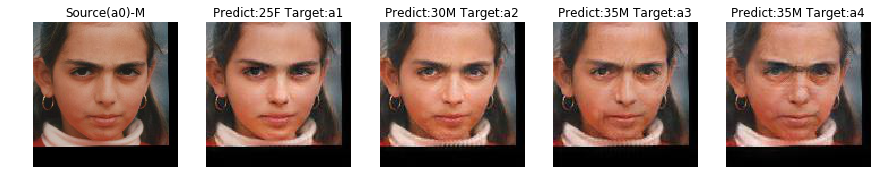

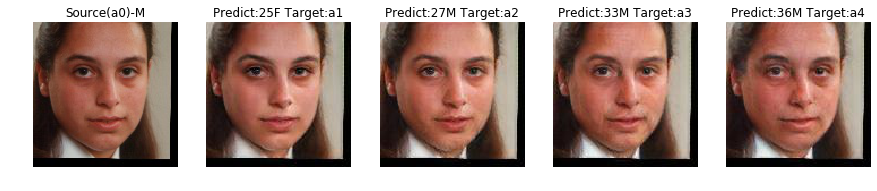

In [0]:
fig = plt.figure(figsize = (15,5))
if len(conver_images1) > 4: #5
  for index in range(1,6):
    plt.subplot(1, 5, index)
    plt.imshow(conver_images1[index-1])
    if index == 1:
      plt.title('Source(a0)-' + genders1[index-1])
    else:
      plt.title("Predict:" +ages1[index-1]+ genders1[index-1] + " Target:a" + str(index-1))
    plt.axis('off')
plt.savefig("result1.png")
plt.show()

fig = plt.figure(figsize = (15,5))
if len(conver_images2) > 4: #5
  for index in range(1,6):
    plt.subplot(1, 5, index)
    plt.imshow(conver_images2[index-1])
    if index == 1:
      plt.title('Source(a0)-'+genders2[index-1])
    else:
      plt.title("Predict:" +ages2[index-1]+ genders2[index-1] +" Target:a" + str(index-1))
    plt.axis('off')
plt.savefig("result2.png")
plt.show()

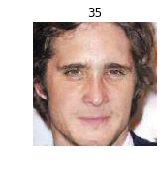

In [0]:
fig = plt.figure(figsize = (15,5))
image1 = image.load_img(image_path)
plt.subplot(221)
img = image.load_img(image_path)
age = int(np.sum(pred * age_categories, axis = 1))
plt.imshow(img)
plt.title(age)
# plt.subplot(222)
# img = image.load_img(image_path)
# plt.imshow(img)
# plt.subplot(223)
# img = image.load_img(image_path)
# plt.imshow(img)
# plt.subplot(224)
# img = image.load_img(image_path)
# plt.imshow(img)
# plt.title(age)
# # plt.subplot(22)
# img = image.load_img(image_path)
# plt.imshow(img)
plt.subplot(232)
img = image.load_img(image_path)
age = int(np.sum(pred * age_categories, axis = 1))
plt.imshow(img)
plt.title(age)
# plt.subplot(232)
# img = image.load_img(image_path)
# plt.imshow(img)
# plt.subplot(233)
# img = image.load_img(image_path)
# plt.imshow(img)
# plt.subplot(234)
# img = image.load_img(image_path)
# plt.imshow(img)
# plt.title(age)
# # plt.subplot(225)
# img = image.load_img(image_path)
# plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
import os
ages = []
i = 0
# file_names = os.listdir('sourcefile.txt')
with open('./sourcefile.txt', 'r+') as f:
  listfile = f.readlines()
  for file in listfile:
    age = file.split(' ')
#     print(age[1])    
    ages.append(age[1])
      

In [0]:
len(ages)

158661

In [0]:
import pandas as pd
series = pd.Series(np.random.normal(size=2000))
#check age distribution 
df = pd.DataFrame(index=range(0, 158661), columns=['age'])
df['age'] = pd.DataFrame(ages)
# age_histo = ages.hist(bins=ages.nunique())

In [0]:
 age_histo = df['age'].hist(bins=df['age'].nunique())